# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Confidence intervals
### VIDEO: Bootstrapping confidence intervals
#### TEACHER: Mike X Cohen, sincxpress.com

In [12]:
# import libraries
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [13]:
# simulate data

rng = np.random.default_rng()

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*rng.standard_normal(size=popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

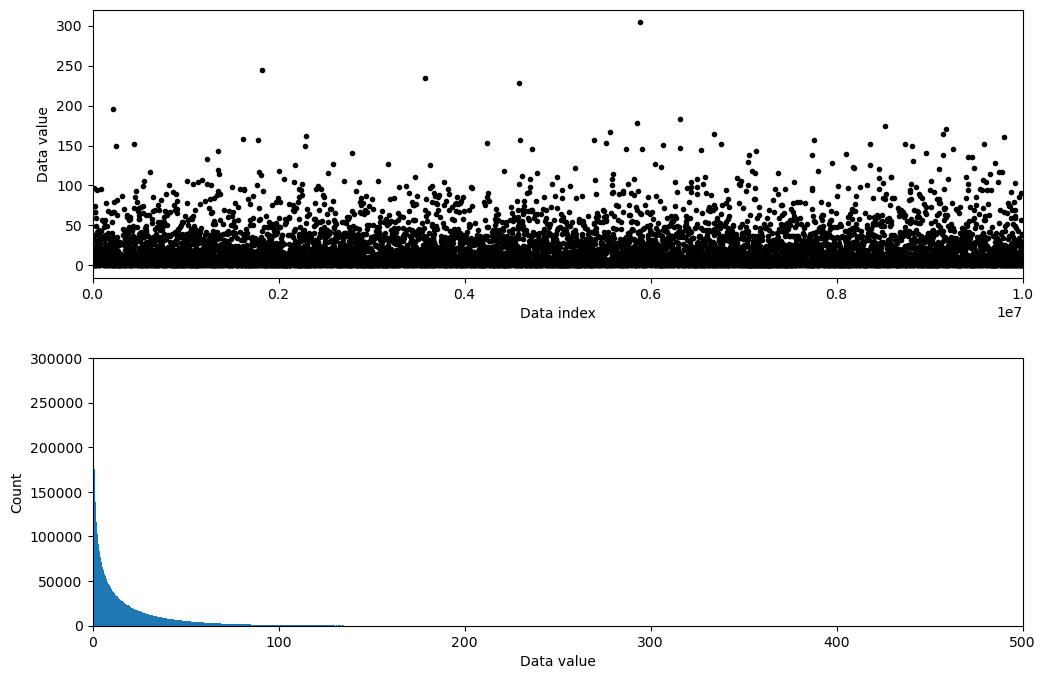

In [14]:
# let's see it
fig, ax = plt.subplots(2, 1, figsize=(12, 8),)
fig.subplots_adjust(hspace=0.3)

# only plot every 1000th sample
ax[0].plot(np.arange(popN)[::1000], population[::1000], 'k.')
ax[0].set_xlabel('Data index')
ax[0].set_xlim([0, popN])
ax[0].set_ylabel('Data value')

ax[1].hist(population, bins='fd')
ax[1].set_xlabel('Data value')
ax[1].set_xlim([0, 500])
ax[1].set_ylabel('Count')
ax[1].set_ylim([0, 300000])
plt.show()

In [15]:
# draw a random sample

# parameters
sample_size = 40
confidence = 95  # in percent

# indices of our sample
isample = rng.integers(low=0, high=popN, size=sample_size)
# sample itself - random values taken from the population
sample = population[isample]
# sample mean
sample_mean = np.mean(sample)
# sample std
sample_std = np.std(sample, ddof=1)
# ^ used later for analytic solution

# now for bootstrapping
numBoots = 1000  # Количество перетасовок
bootmeans = np.zeros(numBoots)  # Количество средних перетасованных выборок

# resample with replacement
# (np.random.choice generates a random sample from a given 1-D array)
for booti in range(numBoots):
    bootmeans[booti] = np.mean(rng.choice(a=sample, size=sample_size,
                                          replace=True))

# find confidence intervals
confint = [0, 0]  # initialize
#                            data   what percentile we are looking for
confint[0] = np.percentile(bootmeans, (100-confidence)/2)  # 2.5%
confint[1] = np.percentile(bootmeans, 100-(100-confidence)/2)  # 97.5%

# Тут важно отметить, что функция percentile обладает параметром interpolation, который по
# умолчанию равен "linear".
# Это означает, что значение желаемого персентиля может не содержаться в исходных данных, а
# будет рассчитано на основе того или иного метода (линейной интерполяции по умолчанию).

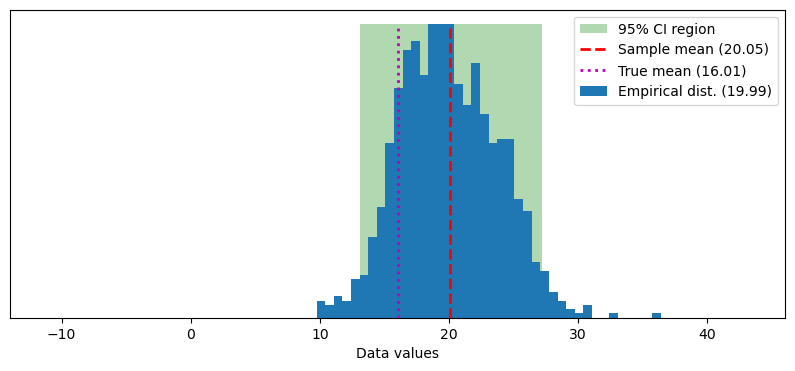

In [16]:
# graph everything
fig, ax = plt.subplots(figsize=(10, 4))

# start with histogram of resampled means
y, x = np.histogram(bootmeans, 40)
y = y/np.max(y)
# x = (x[:-1] + x[1:])/2

# green patch
patch = np.array([[confint[0], 0], [confint[1], 0],
                  [confint[1], 1], [confint[0], 1]])
p = Polygon(patch, facecolor='g', alpha=0.3, label=f'{confidence}% CI region')
ax.add_patch(p)
# histogram
ax.bar(x=x[:-1], height=y, zorder=1, width=np.diff(x), align='edge',
       label=f'Empirical dist. ({np.round(np.mean(bootmeans), 2)})')

# now add the lines
ax.plot([sample_mean, sample_mean], [0, 1], 'r--', linewidth=2, zorder=2,
        label=f'Sample mean ({np.round(sample_mean, 2)})')
ax.plot([popMean, popMean], [0, 1], 'm:', linewidth=2, zorder=3,
        label=f'True mean ({np.round(popMean, 2)})')
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend()
plt.show()

In [17]:
# compute analytic confidence interval
citmp = np.round((100 - confidence)/200, 3)
#                    2.5%  97.5%
CI_T = stats.t.ppf([citmp, 1-citmp], sample_size-1)
confint_anal = sample_mean + CI_T*(sample_std/np.sqrt(sample_size))

# compare the analytic and empirical intervals
print(f"Empirical CI borders: {confint[0]} - {confint[1]}")
print(f"Analytic CI borders: {confint_anal[0]} - {confint_anal[1]}")

Empirical CI borders: 13.139554172490303 - 27.206438334683106
Analytic CI borders: 12.396984916095667 - 27.69540233988924
